Библиотека `SimpleITK` предоставляет упрощенный интерфейс к Insight Segmentation and Registration Toolkit (ITK) – кроссплатформенной открытой библиотеке для обработки изображений в нескольких измерениях. Библиотека ITK разработана на C++, а библиотека `SimpleITK` является оберткой для Python. Существуют обертки и для других языков (R, C#, Java, Lua).

Установить библиотеку `SimpleITK` можно при помощи пакетного менеджера:

    pip install simpleitk

# Чтение и запись

In [21]:
import SimpleITK as sitk

image = sitk.ReadImage("RG1_J2KI.dcm", sitk.sitkFloat32)

In [22]:
type(image)

SimpleITK.SimpleITK.Image

In [38]:
image_rescaled = sitk.RescaleIntensity(image, 0, 255)
image_uint8 = sitk.Cast(image_rescaled, sitk.sitkUInt8)
sitk.WriteImage(image_uint8, "RG1_J2KI.png")

# Методы объекта класса `Image`

In [24]:
image.GetSize()


(1841, 1955, 1)

In [25]:
image.GetPixelIDTypeAsString()

'32-bit float'

In [26]:
image.GetPixel([0,0,0])

13891.0

In [27]:
image.GetDimension()

3

In [28]:
image.SetPixel([0,0,0], 1000.0)

# Конвертация в/из NumPy

In [29]:
array = sitk.GetArrayFromImage(image)
type(array), array.shape

(numpy.ndarray, (1, 1955, 1841))

In [30]:
image = sitk.GetImageFromArray(array)
image.GetSize()

(1841, 1955, 1)

Обратите внимание: порядок индексов в массиве NumPy будет обратным по сравнению с SimpleITK (например, для 3D-изображения SimpleITK использует `(x, y, z)`, а NumPy – `(z, y, x)`)

(-0.5, 1840.5, 1954.5, -0.5)

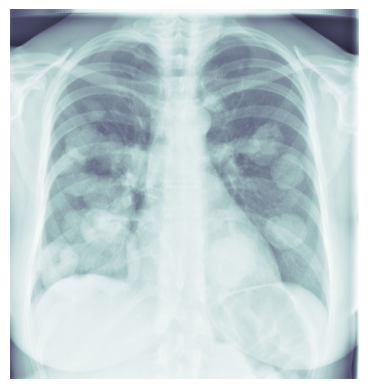

In [31]:
import matplotlib.pyplot as plt

plt.imshow(array.reshape(1955, 1841, 1), cmap='bone')
plt.axis('off')

In [32]:
def show_image(image):
    array = sitk.GetArrayFromImage(image)
    s = array.shape
    plt.imshow(array.reshape(s[1], s[2], s[0]), cmap='bone')
    plt.axis('off')
    plt.show()

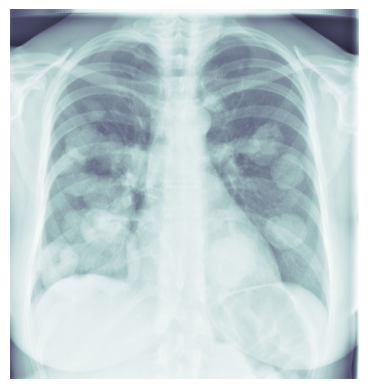

In [33]:
show_image(image)

# Класс `Transform`

In [34]:
transform = sitk.AffineTransform(image.GetDimension())
transform.SetTranslation([100, 50, 0])
transformed_image = sitk.Resample(image, transform=transform, interpolator=sitk.sitkLinear)

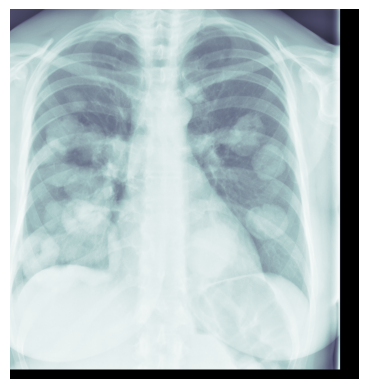

In [35]:
show_image(transformed_image)

# Фильтры

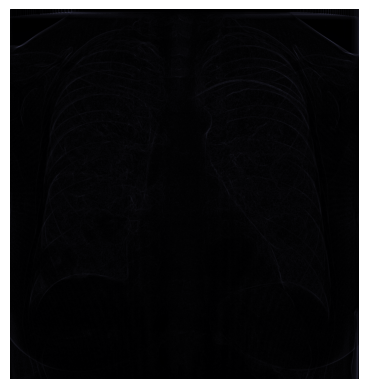

In [36]:
import numpy as np

gradient = sitk.GradientMagnitude(image)

show_image(gradient)

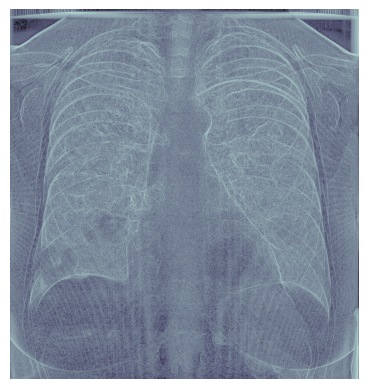

In [37]:
gradient_array = sitk.GetArrayFromImage(gradient)
gradient_log = sitk.GetImageFromArray(np.log(gradient_array+1))

show_image(gradient_log)